# EDA Online Sales

**Objectives**  

Explore and Prepare Data for International Sales BI Dasbhaord  
1. Explore Data - OnlineRetail.csv ... add sales revenue
2. Join Sales with Product Info/Costs ... add transactonal profit
3. Explore pricing and anomalies 
4. Add Demand Statistics

# References

**Online Retail Data Set**  
* Online_sales.zip: https://archive.ics.uci.edu/ml/datasets/Online+Retail
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
* Irvine, CA: University of California, School of Information and Computer Science.
Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

**Product Info**
* This contains the unit cost information for the products sold by the aforementioned UK-based retail company. This can be used together with the preceding Online Sales dataset. 
* This is available in Google Sheets at https://tinyurl.com/ukprodinfo. 
* You can also access it as a CSV file at https://github.com/PacktPublishing/Data-Storytelling-with-Google-Data-Studio/blob/master/Product%20Info.csv.
* This dataset contains all purchases made for an online company above

**PacktPublishing/Data-Storytelling-with-Looker**
* Great introduction to BI design. 
* Contains a dashboared based on the first data set (not product info) at the end of Chapter 1
* https://github.com/PacktPublishing/Data-Storytelling-with-Google-Data-Studio
* https://www.packtpub.com/product/data-storytelling-with-google-looker-studio/9781800568761
* See chapter 7 for reference to the Product Info DataSet and examples of combining it at the BI layer

**Tryo Labs Price Analysis on Olist data set**
*  Good overview of demand statistics ... ADI, COV2
* https://tryolabs.com/blog/2020/06/01/price-optimization-for-e-commerce-a-case-study ... tryolabs article

**ADI and COV2 calculation** 
* https://deep-and-shallow.com/2020/10/07/forecast-error-measures-intermittent-demand/  
* ... good overview showing how to calculate ADI (Average Demand Interval) and COV2 (Coefficient of Variance, squared)


# Sales Data .. add SalesRevenue

In [65]:
import pandas as pd
import numpy as np
#from downcast import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import beautifulplots as bp
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

import beautifulplots as bp


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', None)

In [2]:
data_path = "./data"
filename="online_sales_uci.csv"
df_sales = pd.read_csv(f'{data_path}/{filename}', parse_dates=["InvoiceDate"] )

print("Shape of sales:",df_sales.shape)
df_sales["SalesRevenue"] = df_sales["Quantity"] * df_sales["UnitPrice"]

display(df_sales)

Shape of sales: (541909, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
0,545279,21238,RED RETROSPOT CUP,6,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,5.10
1,545279,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2011-03-01,8.50,17811.0,United Kingdom,Repeat Customer,8.50
2,545279,21731,RED TOADSTOOL LED NIGHT LIGHT,4,2011-03-01,1.65,17811.0,United Kingdom,Repeat Customer,6.60
3,545279,21240,BLUE POLKADOT CUP,12,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,10.20
4,545279,22845,VINTAGE CREAM CAT FOOD CONTAINER,12,2011-03-01,5.55,17811.0,United Kingdom,Repeat Customer,66.60
...,...,...,...,...,...,...,...,...,...,...
541904,551340,22223,CAKE PLATE LOVEBIRD PINK,1,2011-04-27,9.96,NaN,United Kingdom,Repeat Customer,9.96
541905,551340,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-04-27,5.79,NaN,United Kingdom,Repeat Customer,5.79
541906,551340,22420,LIPSTICK PEN BABY PINK,1,2011-04-27,0.83,NaN,United Kingdom,Repeat Customer,0.83
541907,551340,21272,SALLE DE BAIN HOOK,1,2011-04-27,2.46,NaN,United Kingdom,Repeat Customer,2.46


Nulls  
* 25% of customer ID's are missing. Leave as is for now as we can still use all the other stats  
* 0.26% of Descriptions are null, however StockCodes are not null so leave for now

In [123]:
df_sales.isnull().sum().sort_index()/len(df_sales)

Country           0.000000
CustomerID        0.249267
Description       0.002683
InvoiceDate       0.000000
InvoiceNo         0.000000
Quantity          0.000000
RepeatPurchase    0.000000
SalesRevenue      0.000000
StockCode         0.000000
UnitPrice         0.000000
dtype: float64

New Customers vs. Repeat Customers

In [124]:
df.groupby(["RepeatPurchase"])["RepeatPurchase"].count()

RepeatPurchase
New Customer       105452
Repeat Customer    427400
Name: RepeatPurchase, dtype: int64

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       541909 non-null  object        
 1   StockCode       541909 non-null  object        
 2   Description     540455 non-null  object        
 3   Quantity        541909 non-null  int64         
 4   InvoiceDate     541909 non-null  datetime64[ns]
 5   UnitPrice       541909 non-null  float64       
 6   CustomerID      406829 non-null  float64       
 7   Country         541909 non-null  object        
 8   RepeatPurchase  541909 non-null  object        
 9   SalesRevenue    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


In [4]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
SalesRevenue,541909.0,17.987795,378.810824,-168469.60,3.40,9.75,17.40,168469.6


Min and Max Dates



In [32]:
# Min and Max Dates
print(f'min invoice date = {df_sales["InvoiceDate"].min()}' )
print(f'max invoice date = {df_sales["InvoiceDate"].max()}' )


min invoice date = 2010-12-01 00:00:00
max invoice date = 2011-12-09 00:00:00
sales 2010 = 748957.02
sales 2011 = 8998790.913999999
sales % change = 11.015096559212436


Product Summary and Invoices Summary
* interesting to see negative numbers ... seem to be for inventory control, "unsaleable" , "throwaway" ...
* Revenue on some invoices is negative ... again seems to be inventory or returns, etc
* InvoiceNo 581483, largest sales revenue (168469.60), is canceled by a negative invoice of the same negative amount

In [125]:
# Product Orders Summary
aggs={
    "Description":"last",
    "Quantity":"sum"
    
}
product_orders_summary_df = df_sales.groupby(["StockCode"])[["Description","Quantity"]].agg(aggs).reset_index()
product_orders_summary_df.columns=["StockCode","Description", "total"]
product_orders_summary_df = product_orders_summary_df.sort_values("total",ascending=False)

print(f'Total number of products = {len(product_orders_summary_df)}')

print("product order summary")
display(product_orders_summary_df)

# Invoices Summary
aggs={
    "InvoiceDate":"last",
    "Quantity":"sum",
    "SalesRevenue":"sum"
}
invoices_summary_df = df_sales.groupby(["InvoiceNo"])[["InvoiceDate","Quantity","SalesRevenue"]].agg(aggs).reset_index()
invoices_summary_df.columns=["InvoiceNo","InvoiceDate","Description", "SalesRevenue"]
invoices_summary_df=invoices_summary_df.sort_values("SalesRevenue",ascending=False)
display(invoices_summary_df)

Total number of products = 4070
product order summary


,StockCode,Description,total
1147,22197,SMALL POPCORN HOLDER,56450
2997,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
3515,85099B,JUMBO BAG RED RETROSPOT,47363
3536,85123A,WHITE HANGING HEART T-LIGHT HOLDER,38830
3305,84879,ASSORTED COLOUR BIRD ORNAMENT,36221
...,...,...,...
2928,79323LP,"Unsaleable, destroyed.",-2618
2931,79323W,"Unsaleable, destroyed.",-4838
2821,72140F,throw away,-5368
1905,23003,TRAVEL CARD WALLET VINTAGE ROSE,-8516


,InvoiceNo,InvoiceDate,Description,SalesRevenue
22026,581483,2011-12-09,80995,168469.60
2304,541431,2011-01-18,74215,77183.60
18777,574941,2011-11-07,14149,52940.94
19469,576365,2011-11-14,13956,50653.91
9742,556444,2011-06-10,60,38970.00
...,...,...,...,...
25817,C580605,2011-12-05,-1,-17836.46
23338,C550456,2011-04-18,-9014,-22998.40
23854,C556445,2011-06-10,-1,-38970.00
22510,C541433,2011-01-18,-74215,-77183.60


This is the same dataset used in Looker Storyytelling book

Let's check if it contains "RABBIT NIGHT LIGHT" 

For now the customer ID is not used in the dashboard so leave it as is

In [23]:
tmp_descriptions_df = df_sales[df_sales["Description"].notnull()]  # str expression below does not work if field is null
tmp_descriptions_df[tmp_descriptions_df["Description"].str.contains("RABBIT")].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
79,566562,22570,FELTCRAFT CUSHION RABBIT,2,2011-09-13,3.75,17365.0,United Kingdom,Repeat Customer,7.50
88,566562,22570,FELTCRAFT CUSHION RABBIT,1,2011-09-13,3.75,17365.0,United Kingdom,Repeat Customer,3.75
219,576672,23084,RABBIT NIGHT LIGHT,72,2011-11-16,1.79,12731.0,France,Repeat Customer,128.88
360,581013,23084,RABBIT NIGHT LIGHT,48,2011-12-07,1.79,17017.0,United Kingdom,Repeat Customer,85.92
961,559816,22233,JIGSAW RABBIT AND BIRDHOUSE,1,2011-07-12,1.25,NaN,United Kingdom,Repeat Customer,1.25


Country Sales

In [106]:
df_sales.groupby(["Country"])["SalesRevenue"].sum().sort_values(ascending=False)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

Hong Kong

Investigate why Hong Kong profit margin last month is 99 % 

=> it seems its because of the M = manual entries. These should be filtered from the Dashboard

In [128]:
df_sales[df_sales["Country"]=="Hong Kong"].sort_values("InvoiceDate",ascending=True).tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
316911,573154,22620,4 TRADITIONAL SPINNING TOPS,24,2011-10-28,1.45,NaN,Hong Kong,Repeat Customer,34.8
316910,573154,22492,MINI PAINT SET VINTAGE,36,2011-10-28,0.65,NaN,Hong Kong,Repeat Customer,23.4
316912,573154,22452,MEASURING TAPE BABUSHKA PINK,30,2011-10-28,2.95,NaN,Hong Kong,Repeat Customer,88.5
442911,C576233,M,Manual,-1,2011-11-14,326.10,NaN,Hong Kong,Repeat Customer,-326.1
442284,576234,M,Manual,1,2011-11-14,326.10,NaN,Hong Kong,Repeat Customer,326.1


StockCode = 22231

In [130]:
df_sales[df_sales["StockCode"]=="22231"].sort_values("InvoiceDate",ascending=True).tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
521395,580115,22231,JIGSAW TREE WITH BIRDHOUSE,1,2011-12-01,3.29,NaN,United Kingdom,Repeat Customer,3.29
418010,580367,22231,JIGSAW TREE WITH BIRDHOUSE,2,2011-12-02,3.29,NaN,United Kingdom,Repeat Customer,6.58
309354,580527,22231,JIGSAW TREE WITH BIRDHOUSE,2,2011-12-04,0.59,13736.0,United Kingdom,Repeat Customer,1.18
108260,580490,22231,JIGSAW TREE WITH BIRDHOUSE,12,2011-12-04,0.59,15773.0,United Kingdom,New Customer,7.08
261301,581382,22231,JIGSAW TREE WITH BIRDHOUSE,12,2011-12-08,0.59,13860.0,United Kingdom,Repeat Customer,7.08


StockCode = "DOT"

In [131]:
df_sales[df_sales["StockCode"]=="DOT"].sort_values("InvoiceDate",ascending=True).tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
417134,581439,DOT,DOTCOM POSTAGE,1,2011-12-08,938.59,NaN,United Kingdom,Repeat Customer,938.59
416901,581238,DOT,DOTCOM POSTAGE,1,2011-12-08,1683.75,NaN,United Kingdom,Repeat Customer,1683.75
415698,581217,DOT,DOTCOM POSTAGE,1,2011-12-08,863.80,NaN,United Kingdom,Repeat Customer,863.80
463350,581498,DOT,DOTCOM POSTAGE,1,2011-12-09,1714.17,NaN,United Kingdom,Repeat Customer,1714.17
462693,581492,DOT,DOTCOM POSTAGE,1,2011-12-09,933.17,NaN,United Kingdom,Repeat Customer,933.17


Product Sales

In [109]:

aggs={
    "SalesRevenue":"sum",
    "Quantity":"sum",
    "UnitPrice":"mean",
    "Description":"last"
}

df_sales.groupby(["StockCode"]).agg(aggs).sort_values("SalesRevenue",ascending=False)

,SalesRevenue,Quantity,UnitPrice,Description
StockCode,,,,
DOT,206245.480,1707,290.495859,DOTCOM POSTAGE
22423,164762.190,12980,13.781484,REGENCY CAKESTAND 3 TIER
47566,98302.980,18022,5.778587,PARTY BUNTING
85123A,97894.500,38830,3.103238,WHITE HANGING HEART T-LIGHT HOLDER
85099B,92356.030,47363,2.470264,JUMBO BAG RED RETROSPOT
...,...,...,...,...
BANK CHARGES,-7175.639,-13,202.855162,Bank Charges
CRUK,-7933.430,-16,495.839375,CRUK Commission
B,-11062.060,3,-3687.353333,Adjust bad debt


# Product Info Data

In [86]:
data_path = "./data"
filename="product_info.csv"
df_prod_info = pd.read_csv(f'{data_path}/{filename}' )

print("df_prod_info.shape of s:",df_prod_info.shape)

display(df_prod_info)

df_prod_info.shape of s: (3489, 3)


,ProductCode,ProductName,UnitCost
0,84705C,Pink flock photo frame,0.50
1,21238,Red retrospot cup,0.43
2,22844,Vintage cream dog food container,2.55
3,21731,Red toadstool led night light,0.83
4,21240,Blue polkadot cup,0.34
...,...,...,...
3484,23575,Snack tray paisley park,1.17
3485,23580,Snack tray happy forest,0.78
3486,44089A,Pink gauze butterfly lampshade,0.13
3487,20822,Goldie Triangle Mirror,1.67


In [39]:
df_prod_info.isnull().sum()/df_prod_info.shape[0]

ProductCode    0.0
ProductName    0.0
UnitCost       0.0
dtype: float64

data looks clean

# Investigate Sales Anomalies

There are peculiar invoices 

Bad Debt 

negative numbers

These can filtered out in the BI dashboard as needed


In [185]:
display(df_sales[df_sales["InvoiceNo"]== "A563185"])


display(df_sales[df_sales["InvoiceNo"]== "A563186"])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
370541,A563185,B,Adjust bad debt,1,2011-08-12,11062.06,NaN,United Kingdom,Repeat Customer,11062.06


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
370542,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,NaN,United Kingdom,Repeat Customer,-11062.06


Negative UnitPrices ... only a couple of negative values

In [186]:
display(df_sales[df_sales["UnitPrice"]<0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
370542,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,NaN,United Kingdom,Repeat Customer,-11062.06
370543,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,NaN,United Kingdom,Repeat Customer,-11062.06


In [167]:
df_sales[df_sales["InvoiceNo"]=="566562"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
79,566562,22570,FELTCRAFT CUSHION RABBIT,2,2011-09-13,3.75,17365.0,United Kingdom,Repeat Customer,7.50
80,566562,22716,CARD CIRCUS PARADE,12,2011-09-13,0.42,17365.0,United Kingdom,Repeat Customer,5.04
81,566562,23354,6 GIFT TAGS 50'S CHRISTMAS,12,2011-09-13,0.83,17365.0,United Kingdom,Repeat Customer,9.96
82,566562,23549,WRAP BIRD GARDEN,25,2011-09-13,0.42,17365.0,United Kingdom,Repeat Customer,10.50
83,566562,22756,LARGE YELLOW BABUSHKA NOTEBOOK,3,2011-09-13,1.25,17365.0,United Kingdom,Repeat Customer,3.75
...,...,...,...,...,...,...,...,...,...,...
172,566562,22635,CHILDS BREAKFAST SET DOLLY GIRL,2,2011-09-13,9.95,17365.0,United Kingdom,Repeat Customer,19.90
173,566562,23078,ICE CREAM PEN LIP GLOSS,24,2011-09-13,1.25,17365.0,United Kingdom,Repeat Customer,30.00
174,566562,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-09-13,0.29,17365.0,United Kingdom,Repeat Customer,13.92
175,566562,22637,PIGGY BANK RETROSPOT,4,2011-09-13,2.55,17365.0,United Kingdom,Repeat Customer,10.20


Negative Units ... could be returns or invoice corrections

These situations can possibly be legitimate

Again these can be filtred at the BI layer

In [189]:
display(df_sales[df_sales["Quantity"]<0].head(50))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
370,C560221,22456,NATURAL SLATE CHALKBOARD LARGE,-2,2011-07-15,4.25,13408.0,United Kingdom,Repeat Customer,-8.50
371,C568799,M,Manual,-2,2011-09-29,90.00,17450.0,United Kingdom,Repeat Customer,-180.00
372,C568799,M,Manual,-1,2011-09-29,2.88,17450.0,United Kingdom,Repeat Customer,-2.88
373,C568832,23113,PANTRY CHOPPING BOARD,-186,2011-09-29,5.15,17450.0,United Kingdom,Repeat Customer,-957.90
1577,578733,21643,damaged,-9,2011-11-25,0.00,NaN,United Kingdom,Repeat Customer,-0.00
2430,578837,35833P,check,-24,2011-11-25,0.00,NaN,United Kingdom,Repeat Customer,-0.00
2431,578838,21591,check,-267,2011-11-25,0.00,NaN,United Kingdom,Repeat Customer,-0.00
2432,578839,22959,check,-175,2011-11-25,0.00,NaN,United Kingdom,Repeat Customer,-0.00
2433,578840,22142,check,-70,2011-11-25,0.00,NaN,United Kingdom,Repeat Customer,-0.00
3126,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom,New Customer,-4.65


**UnitPrice == 0**

In [199]:
display(df_sales[df_sales["UnitPrice"]==0].head(50))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
1573,578691,85034A,check,24,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,0.0
1574,578692,23157,check,212,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,0.0
1576,578700,72807A,AMAZON,1,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,0.0
1577,578733,21643,damaged,-9,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,-0.0
2430,578837,35833P,check,-24,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,-0.0
2431,578838,21591,check,-267,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,-0.0
2432,578839,22959,check,-175,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,-0.0
2433,578840,22142,check,-70,2011-11-25,0.0,NaN,United Kingdom,Repeat Customer,-0.0
10452,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05,0.0,12647.0,Germany,New Customer,0.0
21623,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16,0.0,16560.0,United Kingdom,New Customer,0.0


In [168]:
filename="online_sales_uci_clean.csv"
df_sales.to_csv(f'{data_path}/{filename}',index=False)

Below we see that the price does vary

In [179]:
df_sales.groupby(["StockCode","UnitPrice"])["Description" ,"UnitPrice"].last()

/var/folders/mv/q8fjq_112p3cn5zntkpq1rjw0000gn/T/ipykernel_71110/2686181179.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sales.groupby(["StockCode","UnitPrice"])["Description" ,"UnitPrice"].last()


Description  UnitPrice
StockCode    UnitPrice                                               
10002        0.85              INFLATABLE POLITICAL GLOBE        0.85
             1.63              INFLATABLE POLITICAL GLOBE        1.63
             1.66              INFLATABLE POLITICAL GLOBE        1.66
10080        0.00                                    check       0.00
             0.39                 GROOVY CACTUS INFLATABLE       0.39
...                                                    ...        ...
gift_0001_40 33.33      Dotcomgiftshop Gift Voucher £40.00      33.33
             34.04      Dotcomgiftshop Gift Voucher £40.00      34.04
gift_0001_50 41.67      Dotcomgiftshop Gift Voucher £50.00      41.67
             42.55      Dotcomgiftshop Gift Voucher £50.00      42.55
m            2.55                                   Manual       2.55

[16532 rows x 2 columns]

Look at StockCode 10002 ... note if the quantity varies with price

Its not clear why prices are varying

UnitPrice is 0.85 , 1.66 , 163 ... varies over time and quantity unclear reasoning

Maybe due to total order ... 

In [183]:
df_sales[df_sales["StockCode"]=="10002"].head(50).sort_values("InvoiceDate",ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
3012,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01,0.85,12583.0,France,New Customer,40.80
3123,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01,0.85,16098.0,United Kingdom,New Customer,10.20
7990,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03,0.85,17967.0,United Kingdom,New Customer,0.85
8982,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05,0.85,13069.0,United Kingdom,New Customer,0.85
11132,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06,0.85,17677.0,United Kingdom,New Customer,20.40
343137,537638,10002,INFLATABLE POLITICAL GLOBE,5,2010-12-07,1.66,NaN,United Kingdom,Repeat Customer,8.30
343868,537642,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-07,1.66,NaN,United Kingdom,Repeat Customer,1.66
14063,537770,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-08,0.85,15529.0,United Kingdom,New Customer,10.20
15992,538086,10002,INFLATABLE POLITICAL GLOBE,10,2010-12-09,0.85,12872.0,United Kingdom,New Customer,8.50
16269,538167,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09,0.85,14713.0,United Kingdom,New Customer,10.20


ProductCode    0.0
ProductName    0.0
UnitCost       0.0
dtype: float64

# Join Sales + Costs (Product Info) ... add Profit

In [40]:
display(df_sales.head(3))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
0,545279,21238,RED RETROSPOT CUP,6,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,5.1
1,545279,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2011-03-01,8.50,17811.0,United Kingdom,Repeat Customer,8.5
2,545279,21731,RED TOADSTOOL LED NIGHT LIGHT,4,2011-03-01,1.65,17811.0,United Kingdom,Repeat Customer,6.6


In [41]:
display(df_prod_info.head(3))

,ProductCode,ProductName,UnitCost
0,84705C,Pink flock photo frame,0.50
1,21238,Red retrospot cup,0.43
2,22844,Vintage cream dog food container,2.55


merge sales with product info

In [92]:
df_sales_w_prodinfo = df_sales.merge(df_prod_info, left_on="StockCode", right_on="ProductCode")

# round monetary values
df_sales_w_prodinfo["Profit"] = df_sales_w_prodinfo["SalesRevenue"] -  df_sales_w_prodinfo["Quantity"] * df_sales_w_prodinfo["UnitCost"]
df_sales_w_prodinfo["UnitPrice"] = np.round(df_sales_w_prodinfo["UnitPrice"],2)
df_sales_w_prodinfo["SalesRevenue"] = np.round(df_sales_w_prodinfo["SalesRevenue"],2)
df_sales_w_prodinfo["UnitCost"] = np.round(df_sales_w_prodinfo["UnitCost"],2)
df_sales_w_prodinfo["Profit"] = np.round(df_sales_w_prodinfo["Profit"],2)
df = df_sales_w_prodinfo

# year plus 10 years ...
#df["InvoiceDate"] = df['InvoiceDate'].apply(lambda x: x.replace(year = x.year + 10))

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue,ProductCode,ProductName,UnitCost,Profit
0,545279,21238,RED RETROSPOT CUP,6,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,5.10,21238,Red retrospot cup,0.43,2.52
1,566562,21238,RED RETROSPOT CUP,2,2011-09-13,0.85,17365.0,United Kingdom,Repeat Customer,1.70,21238,Red retrospot cup,0.43,0.84
2,559817,21238,RED RETROSPOT CUP,2,2011-07-12,1.63,NaN,United Kingdom,Repeat Customer,3.26,21238,Red retrospot cup,0.43,2.40
3,536544,21238,RED RETROSPOT CUP,4,2010-12-01,1.66,NaN,United Kingdom,New Customer,6.64,21238,Red retrospot cup,0.43,4.92
4,536591,21238,RED RETROSPOT CUP,1,2010-12-01,0.85,14606.0,United Kingdom,New Customer,0.85,21238,Red retrospot cup,0.43,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532847,579668,23580,SNACK TRAY HAPPY FOREST,8,2011-11-30,1.95,15152.0,United Kingdom,Repeat Customer,15.60,23580,Snack tray happy forest,0.78,9.36
532848,578941,44089A,PINK GAUZE BUTTERFLY LAMPSHADE,8,2011-11-27,0.42,16024.0,United Kingdom,New Customer,3.36,44089A,Pink gauze butterfly lampshade,0.13,2.32
532849,543022,44089A,PINK GAUZE BUTTERFLY LAMPSHADE,4,2011-02-02,0.42,16771.0,United Kingdom,Repeat Customer,1.68,44089A,Pink gauze butterfly lampshade,0.13,1.16
532850,547498,44089A,PINK GAUZE BUTTERFLY LAMPSHADE,1,2011-03-23,0.42,15021.0,United Kingdom,Repeat Customer,0.42,44089A,Pink gauze butterfly lampshade,0.13,0.29


Observe content of one invoice

In [93]:
df[df["InvoiceNo"]=="566562"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue,ProductCode,ProductName,UnitCost,Profit
1,566562,21238,RED RETROSPOT CUP,2,2011-09-13,0.85,17365.0,United Kingdom,Repeat Customer,1.70,21238,Red retrospot cup,0.43,0.84
1704,566562,21240,BLUE POLKADOT CUP,2,2011-09-13,0.85,17365.0,United Kingdom,Repeat Customer,1.70,21240,Blue polkadot cup,0.34,1.02
2557,566562,21239,PINK POLKADOT CUP,2,2011-09-13,0.85,17365.0,United Kingdom,Repeat Customer,1.70,21239,Pink polkadot cup,0.26,1.18
33500,566562,23310,BUBBLEGUM RING ASSORTED,72,2011-09-13,0.42,17365.0,United Kingdom,Repeat Customer,30.24,23310,Bubblegum ring assorted,0.21,15.12
45039,566562,22570,FELTCRAFT CUSHION RABBIT,2,2011-09-13,3.75,17365.0,United Kingdom,Repeat Customer,7.50,22570,Feltcraft cushion rabbit,1.88,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67597,566562,22635,CHILDS BREAKFAST SET DOLLY GIRL,2,2011-09-13,9.95,17365.0,United Kingdom,Repeat Customer,19.90,22635,Childs breakfast set dolly girl,3.98,11.94
67801,566562,23078,ICE CREAM PEN LIP GLOSS,24,2011-09-13,1.25,17365.0,United Kingdom,Repeat Customer,30.00,23078,Ice cream pen lip gloss,0.75,12.00
68060,566562,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-09-13,0.29,17365.0,United Kingdom,Repeat Customer,13.92,84077,World war 2 gliders asstd designs,0.17,5.76
68602,566562,22637,PIGGY BANK RETROSPOT,4,2011-09-13,2.55,17365.0,United Kingdom,Repeat Customer,10.20,22637,Piggy bank retrospot,1.28,5.08


Daily Sales and Quantity

max daily sales = 111316.54
min daily sales 3438.16


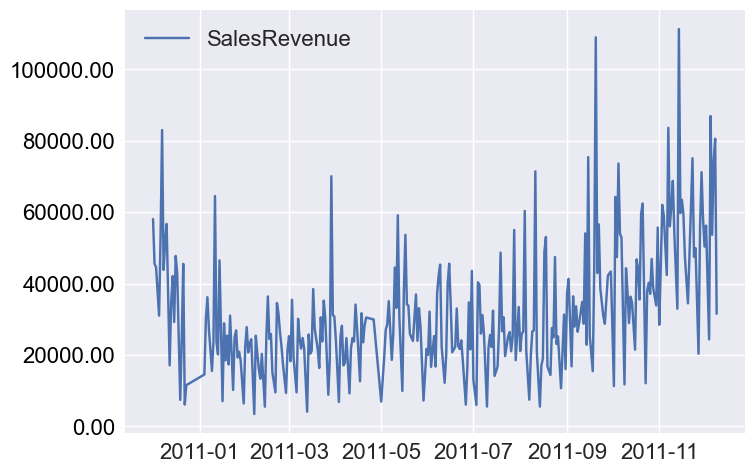

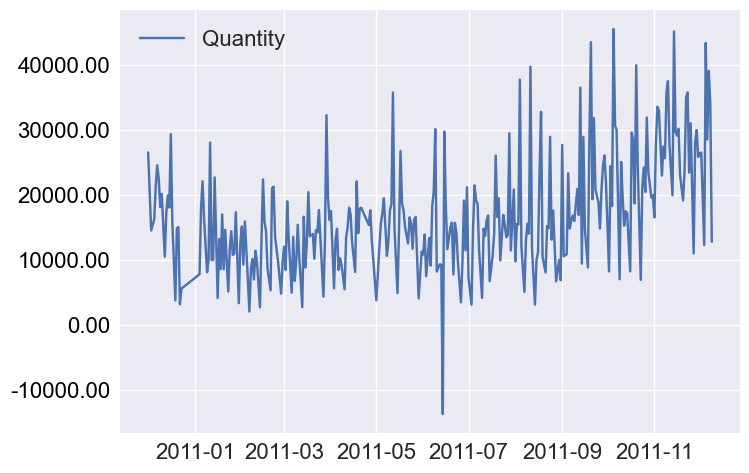

In [94]:
df_salesday=df.groupby(["InvoiceDate"])[["Quantity","SalesRevenue"]].sum().reset_index().sort_values("InvoiceDate",ascending=True)

print("max daily sales =",df_salesday["SalesRevenue"].max())
print("min daily sales",df_salesday["SalesRevenue"].min())

bp.lineplot(df_salesday,x="InvoiceDate" , y="SalesRevenue")
bp.lineplot(df_salesday,x="InvoiceDate" , y="Quantity")


Base Stats

In [95]:

sales_2010=df[df["InvoiceDate"] < pd.to_datetime('2011-1-1') ]["SalesRevenue"].sum()
sales_2011=df[df["InvoiceDate"] > pd.to_datetime('2010-12-31') ]["SalesRevenue"].sum()
print(f'sales 2010 = {sales_2010}')
print(f'sales 2011 = {sales_2011}')
print(f'sales % change = {100*(sales_2011 - sales_2010) /sales_2010}')

sales 2010 = 776419.35
sales 2011 = 9068982.25
sales % change = 1068.0520649053892


# Demand Statistics - ADI , COV^2 - Smooth, Intermittent, Erratic, Lumpy

In [46]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue
0,545279,21238,RED RETROSPOT CUP,6,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,5.1
1,545279,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2011-03-01,8.50,17811.0,United Kingdom,Repeat Customer,8.5
2,545279,21731,RED TOADSTOOL LED NIGHT LIGHT,4,2011-03-01,1.65,17811.0,United Kingdom,Repeat Customer,6.6
3,545279,21240,BLUE POLKADOT CUP,12,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,10.2
4,545279,22845,VINTAGE CREAM CAT FOOD CONTAINER,12,2011-03-01,5.55,17811.0,United Kingdom,Repeat Customer,66.6


In [47]:
df_sales["InvoiceDate"]

0        2011-03-01
1        2011-03-01
2        2011-03-01
3        2011-03-01
4        2011-03-01
            ...    
541904   2011-04-27
541905   2011-04-27
541906   2011-04-27
541907   2011-04-27
541908   2011-04-27
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

Demand Statistics - Daily

In [48]:

# create demand_stats_df
df_demand_stats_day = df_sales.copy()

# consolidate all StockCode orders to a date ... Quantiy StockCode per Date
aggs = {
    "Quantity":"sum",
    "Description":"last"
}
df_demand_stats_day = df_demand_stats_day.groupby(["StockCode","InvoiceDate"]).agg(aggs).reset_index()
df_demand_stats_day = df_demand_stats_day.sort_values(["StockCode","InvoiceDate"], ascending = [False,True])
display(df_demand_stats_day)

# Demand Stats Aggregation
# create aggregation variables 
df_demand_stats_day["QuantityTotal"] = df_demand_stats_day["Quantity"]
df_demand_stats_day["N_NonZeroDemandPeriods"] = df_demand_stats_day["Quantity"]
df_demand_stats_day["QuantityStd"] = df_demand_stats_day["Quantity"]  # mean order quantiy (don't counnt zero orders)
df_demand_stats_day["QuantityAvg"] = df_demand_stats_day["Quantity"]  # order quantity std deviation (don't count zero orders)
df_demand_stats_day["MinInvoiceDate"] = df_demand_stats_day["InvoiceDate"]
df_demand_stats_day["MaxInvoiceDate"] = df_demand_stats_day["InvoiceDate"]

# Demand Stats Aggregation ... min and max dates, N demand periods, ADI, COV^2
aggs = {
    "Description":"last",
    "QuantityTotal":"sum",
    "QuantityAvg":"mean",   # average quantity per order
    "QuantityStd":"std",    # quantiy std deviation per order
    "N_NonZeroDemandPeriods":"count",
    "MinInvoiceDate":"first",
    "MaxInvoiceDate":"last"
}
df_demand_stats_day = df_demand_stats_day.groupby(["StockCode"]).agg(aggs)
df_demand_stats_day["N_DemandPeriods"] = (df_demand_stats_day["MaxInvoiceDate"] - df_demand_stats_day["MinInvoiceDate"]).dt.days + 1
df_demand_stats_day = df_demand_stats_day[df_demand_stats_day["QuantityTotal"]> 0]      # filter out net TotalQuantity <= 0
df_demand_stats_day = df_demand_stats_day[df_demand_stats_day["N_DemandPeriods"] > 1]   # must have more than one demand period
df_demand_stats_day["ADI"] = df_demand_stats_day["N_DemandPeriods"]/df_demand_stats_day["N_NonZeroDemandPeriods"]  # measure of N days before zero demand
df_demand_stats_day["COV2"] = df_demand_stats_day["QuantityStd"]/df_demand_stats_day["QuantityAvg"] # variability of the demand size normalized
df_demand_stats_day = df_demand_stats_day.reset_index()

# demand type
def demand_type(row):
    if row['ADI']  <= 1.32 and row['COV2'] <= 0.49: type = 'Smooth'
    elif row['ADI']  > 1.32 and row['COV2'] <= 0.49: type = 'Intermitent'
    elif row['ADI']  > 1.32 and row['COV2'] > 0.49: type  = 'Lumpy'
    elif row['ADI']  <= 1.32 and row['COV2'] > 0.49: type = 'Eratic'
    else: type = None
    return type

df_demand_stats_day["demand_type"] = df_demand_stats_day.apply(lambda row: demand_type(row),axis=1)

display(df_demand_stats_day.tail(10))


,StockCode,InvoiceDate,Quantity,Description
280450,m,2010-12-21,1,Manual
280446,gift_0001_50,2010-12-23,1,Dotcomgiftshop Gift Voucher £50.00
280447,gift_0001_50,2011-05-06,1,Dotcomgiftshop Gift Voucher £50.00
280448,gift_0001_50,2011-06-24,1,Dotcomgiftshop Gift Voucher £50.00
280449,gift_0001_50,2011-06-30,1,Dotcomgiftshop Gift Voucher £50.00
...,...,...,...,...
43,10002,2011-04-01,120,INFLATABLE POLITICAL GLOBE
44,10002,2011-04-03,6,INFLATABLE POLITICAL GLOBE
45,10002,2011-04-15,62,INFLATABLE POLITICAL GLOBE
46,10002,2011-04-18,1,INFLATABLE POLITICAL GLOBE


,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinInvoiceDate,MaxInvoiceDate,N_DemandPeriods,ADI,COV2,demand_type
3642,DCGSSGIRL,GIRLS PARTY BAG,47,3.916667,5.017394,12,2011-02-07,2011-11-16,283,23.583333,1.281037,Lumpy
3643,DOT,DOTCOM POSTAGE,1707,7.519824,66.363996,227,2010-12-01,2011-12-09,374,1.647577,8.825206,Lumpy
3644,M,Manual,3164,14.648148,200.060308,216,2010-12-01,2011-12-09,374,1.731481,13.657720,Lumpy
3645,PADS,PADS TO MATCH ALL CUSHIONS,4,1.333333,0.577350,3,2011-04-15,2011-09-25,164,54.666667,0.433013,Intermitent
3646,POST,POSTAGE,6353,22.852518,101.387290,278,2010-12-01,2011-12-09,374,1.345324,4.436592,Lumpy
3647,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,39,5.571429,11.222851,7,2011-03-07,2011-12-08,277,39.571429,2.014358,Lumpy
3648,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,20,2.000000,2.828427,10,2011-01-05,2011-10-31,300,30.000000,1.414214,Lumpy
3649,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,37,5.285714,11.338934,7,2011-01-05,2011-09-02,241,34.428571,2.145204,Lumpy
3650,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3,1.000000,0.000000,3,2010-12-20,2011-07-27,220,73.333333,0.000000,Intermitent
3651,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4,1.000000,0.000000,4,2010-12-23,2011-06-30,190,47.500000,0.000000,Intermitent


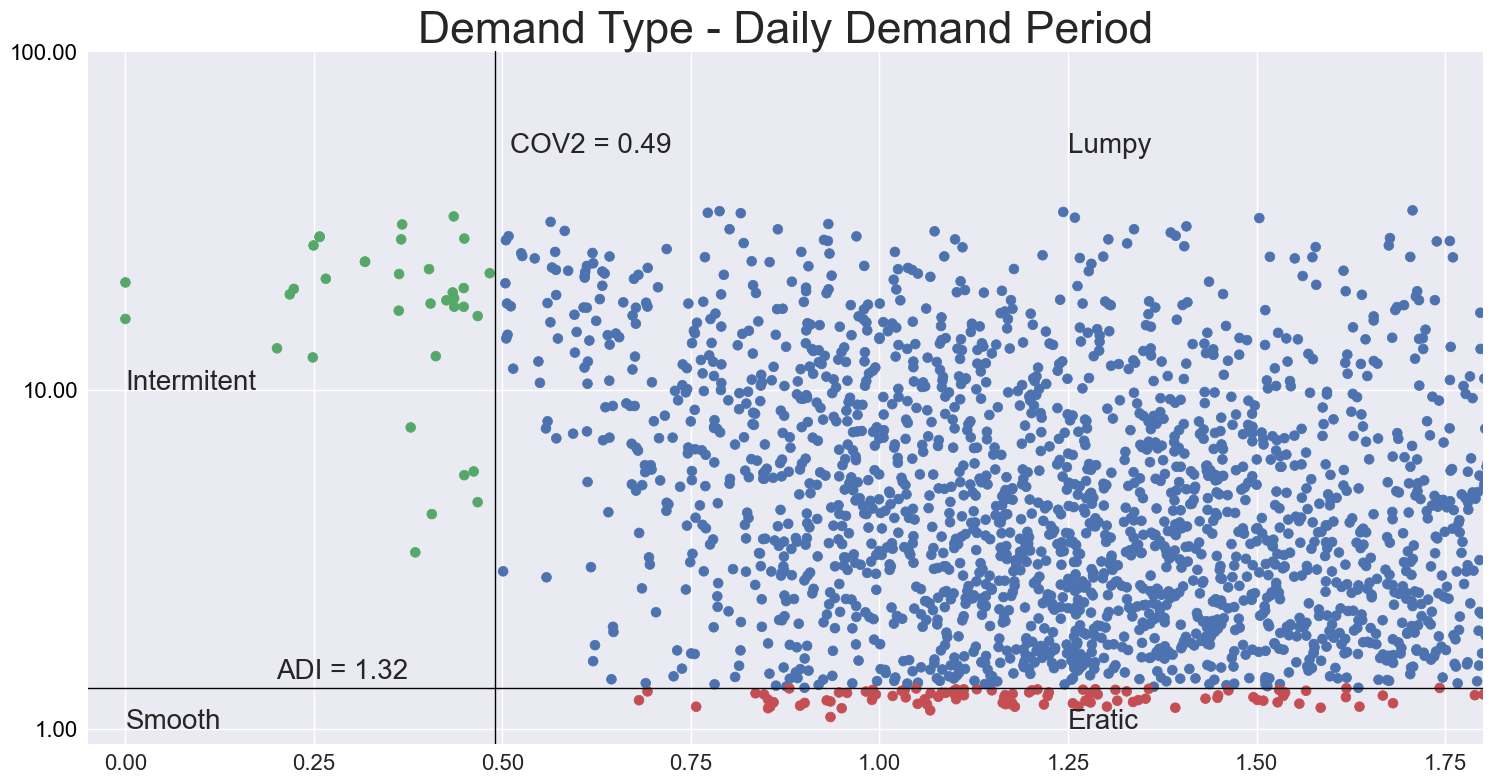

In [49]:

bp.scatterplot(df_demand_stats_day[df_demand_stats_day["N_NonZeroDemandPeriods"]>10], 'COV2', 'ADI' ,  hue='demand_type', y_scale = "log", 
                          figsize=(18,9), legend=False,
                          h_line=1.32, yscale="log"    ,v_line=0.49, 
                          h_line_label= "ADI = 1.32", 
                    
                          annotate = [ ('ADI = 1.32', (0.2, 1.4) ), 
                                       ('COV2 = 0.49' ,(0.51 ,50)),
                                       ('Smooth',(0,1)),
                                       ('Intermitent',(0,10)),
                                       ('Lumpy',(1.25,50)),
                                       ('Eratic',(1.25,1))],
               
                          annotate_fontsize = 20, 
               
                          title='Demand Type - Daily Demand Period',  title_fontsize = 32)

Demand Stats Week

In [50]:
# create demand_stats_df
df_demand_stats_week = df_sales.copy()

df_demand_stats_week['weekiso']=df_demand_stats_week['InvoiceDate'].dt.isocalendar().week
df_demand_stats_week['yeariso']=df_demand_stats_week['InvoiceDate'].dt.isocalendar().year
df_demand_stats_week['yearweek']= df_demand_stats_week['yeariso']*100+df_demand_stats_week['weekiso'] 

# consolidate all StockCode orders to a week... Quantiy StockCode per Date
aggs = {
    "Quantity":"sum",
    "Description":"last"
}
df_demand_stats_week = df_demand_stats_week.groupby(["StockCode","yearweek"]).agg(aggs).reset_index()
df_demand_stats_week = df_demand_stats_week.sort_values(["StockCode","yearweek"], ascending = [False,True])
display(df_demand_stats_week)


# Demand Stats Aggregation
# create aggregation variables 
df_demand_stats_week["QuantityTotal"] = df_demand_stats_week["Quantity"]
df_demand_stats_week["N_NonZeroDemandPeriods"] = df_demand_stats_week["Quantity"]
df_demand_stats_week["QuantityStd"] = df_demand_stats_week["Quantity"]  # mean order quantiy (don't counnt zero orders)
df_demand_stats_week["QuantityAvg"] = df_demand_stats_week["Quantity"]  # order quantity std deviation (don't count zero orders)
df_demand_stats_week["MinWeek"] = df_demand_stats_week["yearweek"]
df_demand_stats_week["MaxWeek"] = df_demand_stats_week["yearweek"]

# Demand Stats Aggregation ... min and max dates, N demand periods, ADI, COV^2
aggs = {
    "Description":"last",
    "QuantityTotal":"sum",
    "QuantityAvg":"mean",   # average quantity per order
    "QuantityStd":"std",    # quantiy std deviation per order
    "N_NonZeroDemandPeriods":"count",
    "MinWeek":"first",
    "MaxWeek":"last"
}
df_demand_stats_week = df_demand_stats_week.groupby(["StockCode"]).agg(aggs)
df_demand_stats_week["N_DemandPeriods"] = df_demand_stats_week["MaxWeek"] - df_demand_stats_week["MinWeek"] + 1
df_demand_stats_week = df_demand_stats_week[df_demand_stats_week["QuantityTotal"]> 0]      # filter out net TotalQuantity <= 0
df_demand_stats_week = df_demand_stats_week[df_demand_stats_week["N_DemandPeriods"] > 1]   # must have more than one demand period
df_demand_stats_week["ADI"] = df_demand_stats_week["N_DemandPeriods"]/df_demand_stats_week["N_NonZeroDemandPeriods"]  # measure of N days before zero demand
df_demand_stats_week["COV2"] = df_demand_stats_week["QuantityStd"]/df_demand_stats_week["QuantityAvg"] # variability of the demand size normalized
df_demand_stats_week = df_demand_stats_week.reset_index()



# demand type
def demand_type(row):
    if row['ADI']  <= 1.32 and row['COV2'] <= 0.49: type = 'Smooth'
    elif row['ADI']  > 1.32 and row['COV2'] <= 0.49: type = 'Intermitent'
    elif row['ADI']  > 1.32 and row['COV2'] > 0.49: type  = 'Lumpy'
    elif row['ADI']  <= 1.32 and row['COV2'] > 0.49: type = 'Eratic'
    else: type = None
    return type

df_demand_stats_week["demand_type"] = df_demand_stats_week.apply(lambda row: demand_type(row),axis=1)

display(df_demand_stats_week.tail(10))


,StockCode,yearweek,Quantity,Description
103160,m,201051,1,Manual
103156,gift_0001_50,201051,1,Dotcomgiftshop Gift Voucher £50.00
103157,gift_0001_50,201118,1,Dotcomgiftshop Gift Voucher £50.00
103158,gift_0001_50,201125,1,Dotcomgiftshop Gift Voucher £50.00
103159,gift_0001_50,201126,1,Dotcomgiftshop Gift Voucher £50.00
...,...,...,...,...
15,10002,201112,11,INFLATABLE POLITICAL GLOBE
16,10002,201113,306,INFLATABLE POLITICAL GLOBE
17,10002,201115,62,INFLATABLE POLITICAL GLOBE
18,10002,201116,1,INFLATABLE POLITICAL GLOBE


,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
3633,DCGSSGIRL,GIRLS PARTY BAG,47,4.700000,5.457920,10,201106,201146,41,4.1,1.161260,Lumpy
3634,DOT,DOTCOM POSTAGE,1707,32.207547,137.999632,53,201048,201149,102,1.924528,4.284699,Lumpy
3635,M,Manual,3164,59.698113,412.297996,53,201048,201149,102,1.924528,6.906382,Lumpy
3636,PADS,PADS TO MATCH ALL CUSHIONS,4,1.333333,0.577350,3,201115,201138,24,8.0,0.433013,Intermitent
3637,POST,POSTAGE,6353,119.867925,230.180284,53,201048,201149,102,1.924528,1.920283,Lumpy
3638,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,39,6.500000,12.988456,6,201110,201149,40,6.666667,1.998224,Lumpy
3639,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,20,2.500000,3.116775,8,201101,201144,44,5.5,1.246710,Lumpy
3640,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,37,7.400000,13.758634,5,201101,201135,35,7.0,1.859275,Lumpy
3641,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3,1.000000,0.000000,3,201051,201130,80,26.666667,0.000000,Intermitent
3642,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4,1.000000,0.000000,4,201051,201126,76,19.0,0.000000,Intermitent


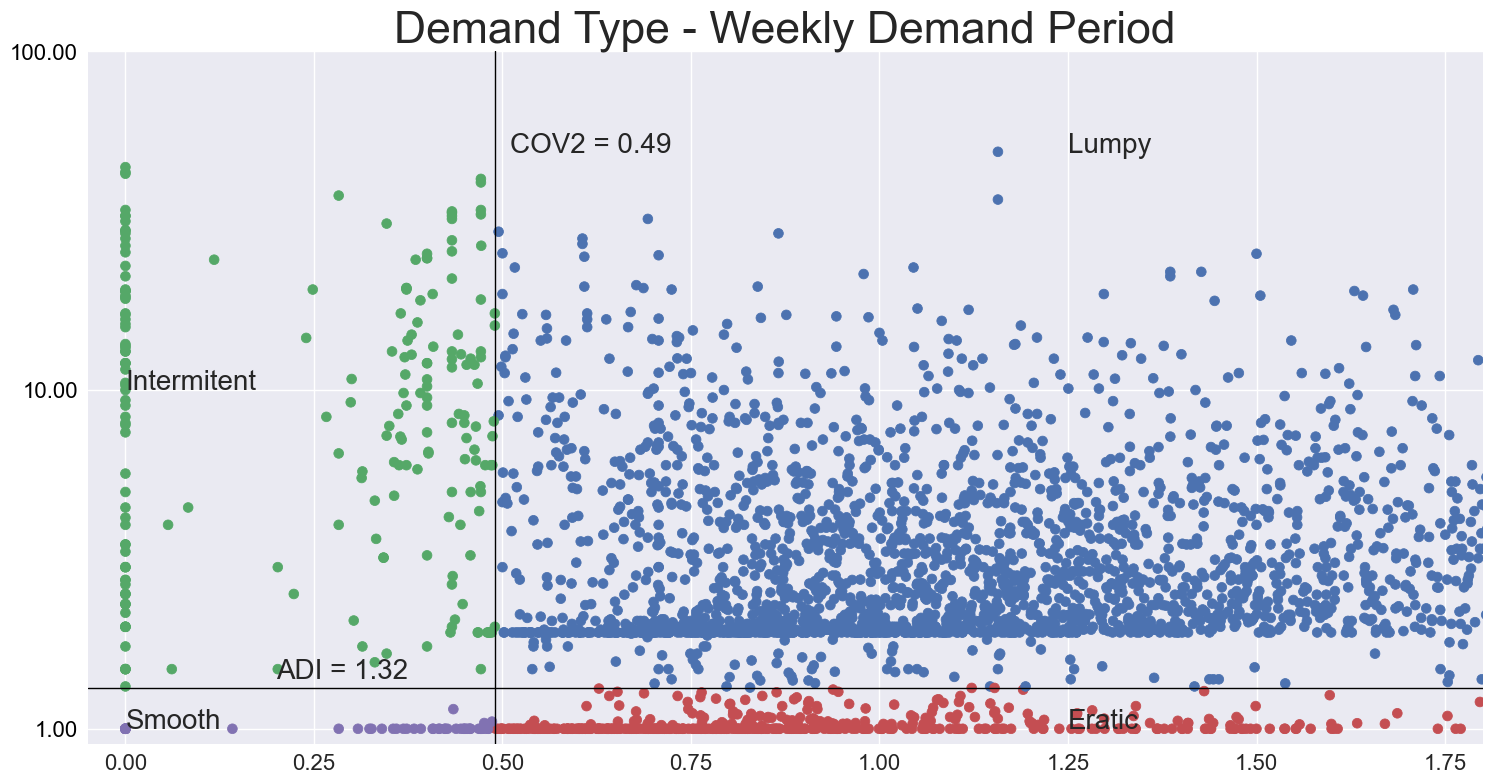

In [51]:

bp.scatterplot(df_demand_stats_week[df_demand_stats_week["N_NonZeroDemandPeriods"]> 0], 'COV2', 'ADI' ,  hue='demand_type', y_scale = "log", 
                          figsize=(18,9), legend=False,
                          h_line=1.32, yscale="log"    ,v_line=0.49, 
                          h_line_label= "ADI = 1.32", 
                    
                          annotate = [ ('ADI = 1.32', (0.2, 1.4) ), 
                                       ('COV2 = 0.49' ,(0.51 ,50)),
                                       ('Smooth',(0,1)),
                                       ('Intermitent',(0,10)),
                                       ('Lumpy',(1.25,50)),
                                       ('Eratic',(1.25,1))],
               
                          annotate_fontsize = 20, 
               
                          title='Demand Type - Weekly Demand Period',  title_fontsize = 32)              




In [112]:
df_demand_stats_week[  (df_demand_stats_week["ADI"] > 1.9 ) &  (df_demand_stats_week["ADI"] < 2.1 )].head(50)

,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
11,15036,ASSORTED COLOURS SILK FAN,22552,425.509434,525.373187,53,201048,201149,102,1.924528,1.234692,Lumpy
12,15039,SANDALWOOD FAN,2065,41.300000,73.131207,50,201048,201149,102,2.04,1.770731,Lumpy
17,15056BL,EDWARDIAN PARASOL BLACK,2714,51.207547,53.983031,53,201048,201149,102,1.924528,1.054201,Lumpy
18,15056N,EDWARDIAN PARASOL NATURAL,3897,73.528302,63.827473,53,201048,201149,102,1.924528,0.868067,Lumpy
19,15056P,EDWARDIAN PARASOL PINK,768,14.490566,20.227193,53,201048,201149,102,1.924528,1.395887,Lumpy
45,16156S,WRAP PINK FAIRY CAKES,5690,116.122449,130.911330,49,201048,201149,102,2.081633,1.127356,Lumpy
47,16161P,WRAP ENGLISH ROSE,7201,144.020000,95.512899,50,201048,201149,102,2.04,0.663192,Lumpy
52,16169M,WRAP DAISY CARPET,660,28.695652,8.688732,23,201101,201148,48,2.086957,0.302789,Intermitent
63,16235,RECYCLED PENCIL WITH RABBIT ERASER,3103,63.326531,102.672089,49,201048,201149,102,2.081633,1.621312,Lumpy
65,16237,SLEEPING CAT ERASERS,4934,94.884615,83.609891,52,201048,201149,102,1.961538,0.881174,Lumpy


In [53]:
df_demand_stats_week.head()

,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
0,10002,INFLATABLE POLITICAL GLOBE,1037,51.8500,73.252465,20,201048,201117,70,3.5,1.412777,Lumpy
1,10080,GROOVY CACTUS INFLATABLE,495,30.9375,43.308919,16,201108,201147,40,2.5,1.399884,Lumpy
2,10120,DOGGY RUBBER,193,9.6500,10.830148,20,201048,201148,101,5.05,1.122295,Lumpy
3,10124A,SPOTS ON RED BOOKCOVER TAPE,16,3.2000,1.303840,5,201049,201144,96,19.2,0.407450,Intermitent
4,10124G,ARMY CAMO BOOKCOVER TAPE,17,4.2500,0.500000,4,201048,201144,97,24.25,0.117647,Intermitent


In [101]:
df_demand_stats=df_demand_stats_week.drop("Description",axis=1)

# Save DataSets

sales with product info

In [98]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RepeatPurchase,SalesRevenue,ProductCode,ProductName,UnitCost,Profit
0,545279,21238,RED RETROSPOT CUP,6,2011-03-01,0.85,17811.0,United Kingdom,Repeat Customer,5.10,21238,Red retrospot cup,0.43,2.52
1,566562,21238,RED RETROSPOT CUP,2,2011-09-13,0.85,17365.0,United Kingdom,Repeat Customer,1.70,21238,Red retrospot cup,0.43,0.84
2,559817,21238,RED RETROSPOT CUP,2,2011-07-12,1.63,NaN,United Kingdom,Repeat Customer,3.26,21238,Red retrospot cup,0.43,2.40
3,536544,21238,RED RETROSPOT CUP,4,2010-12-01,1.66,NaN,United Kingdom,New Customer,6.64,21238,Red retrospot cup,0.43,4.92
4,536591,21238,RED RETROSPOT CUP,1,2010-12-01,0.85,14606.0,United Kingdom,New Customer,0.85,21238,Red retrospot cup,0.43,0.42


In [96]:
filename="onlinesales_with_prodinfo.csv"
df.to_csv(f'{data_path}/{filename}',index=False)

demand stats

In [102]:
df_demand_stats.head()

,StockCode,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
0,10002,1037,51.8500,73.252465,20,201048,201117,70,3.5,1.412777,Lumpy
1,10080,495,30.9375,43.308919,16,201108,201147,40,2.5,1.399884,Lumpy
2,10120,193,9.6500,10.830148,20,201048,201148,101,5.05,1.122295,Lumpy
3,10124A,16,3.2000,1.303840,5,201049,201144,96,19.2,0.407450,Intermitent
4,10124G,17,4.2500,0.500000,4,201048,201144,97,24.25,0.117647,Intermitent


In [110]:
filename="demandstats_week.csv"
cols = ["StockCode","QuantityAvg","QuantityStd","N_NonZeroDemandPeriods","N_Demand_Periods",]
df_demand_stats_week.to_csv(f'{data_path}/{filename}',index=False)

In [114]:
df_demand_stats_week[ (df_demand_stats_week["COV2"] < 2 ) &  (df_demand_stats_week["ADI"] < 2 )]

,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
11,15036,ASSORTED COLOURS SILK FAN,22552,425.509434,525.373187,53,201048,201149,102,1.924528,1.234692,Lumpy
17,15056BL,EDWARDIAN PARASOL BLACK,2714,51.207547,53.983031,53,201048,201149,102,1.924528,1.054201,Lumpy
18,15056N,EDWARDIAN PARASOL NATURAL,3897,73.528302,63.827473,53,201048,201149,102,1.924528,0.868067,Lumpy
19,15056P,EDWARDIAN PARASOL PINK,768,14.490566,20.227193,53,201048,201149,102,1.924528,1.395887,Lumpy
25,15058C,ICE CREAM DESIGN GARDEN PARASOL,210,7.777778,15.212175,27,201105,201149,45,1.666667,1.955851,Lumpy
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,90152B,BLUE/GREEN SHELL NECKLACE W PENDANT,2,1.000000,0.000000,2,201048,201050,3,1.5,0.000000,Intermitent
3517,90167,BEADED LOVE HEART JEWELLERY SET,20,10.000000,0.000000,2,201048,201049,2,1.0,0.000000,Smooth
3539,90179B,PURPLE FINE BEAD NECKLACE W TASSEL,3,1.000000,0.000000,3,201147,201149,3,1.0,0.000000,Smooth
3631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,3,1.500000,0.707107,2,201049,201051,3,1.5,0.471405,Intermitent


In [121]:
df_demand_stats_week[df_demand_stats_week["StockCode"] == "23477"]

,StockCode,Description,QuantityTotal,QuantityAvg,QuantityStd,N_NonZeroDemandPeriods,MinWeek,MaxWeek,N_DemandPeriods,ADI,COV2,demand_type
2220,23477,WOODLAND LARGE BLUE FELT HEART,92,13.142857,1.864454,7,201142,201148,7,1.0,0.141861,Smooth


In [117]:
df_demand_stats_week.shape

(3643, 12)